# 🎬 SQL Data Analysis on Box Office Movies Dataset

**Author:** [Your Name]

This project demonstrates how to use SQL (with SQLite) inside Python to analyze a cleaned dataset of all-time box office movie revenues. The workflow includes data wrangling, querying, and visualization.

## 🧰 Tools Used
- Python (Pandas, Matplotlib)
- SQLite3
- Jupyter Notebook

## 🔍 Objectives
- Clean movie revenue data
- Load into SQLite for SQL analysis
- Analyze revenue distributions
- Visualize insights with Matplotlib

In [99]:
# 1. Import Libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

In [86]:
# 2. Load Dataset
df = pd.read_csv('All Time Worldwide Box Office.csv')
df.tail()

,Rank,Year,Movie,WorldwideBox Office,DomesticBox Office,InternationalBox Office
590,596,2010,Knight and Day,"$258,751,370","$76,423,035","$182,328,335"
591,597,1985,Out of Africa,"$258,210,860","$79,096,868","$179,113,992"
592,598,2011,Super 8,"$257,972,745","$127,004,179","$130,968,566"
593,599,2013,American Hustle,"$257,858,943","$150,098,456","$107,760,487"
594,600,2000,Erin Brockovich,"$257,805,243","$125,548,685","$132,256,558"


In [19]:
# 3. Clean Columns & Currency Fields
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
for col in ['worldwidebox_office', 'domesticbox_office', 'internationalbox_office']:
    df[col] = df[col].replace('[\$,]', '', regex=True).replace(',', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.head()

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\user\AppData\Local\Temp\ipykernel_7392\3278089557.py:4: SyntaxWarning: invalid escape sequence '\$'
  df[col] = df[col].replace('[\$,]', '', regex=True).replace(',', '', regex=True)


,rank,year,movie,worldwidebox_office,domesticbox_office,internationalbox_office
0,1,2009,Avatar,2845899541,760507625.0,2085391916
1,2,2019,Avengers: Endgame,2797800564,858373000.0,1939427564
2,3,1997,Titanic,2207986545,659363944.0,1548622601
3,4,2015,Star Wars Ep. VII: The Force Awakens,2064615817,936662225.0,1127953592
4,5,2018,Avengers: Infinity War,2044540523,678815482.0,1365725041


In [21]:
df.isnull().sum()

rank                       0
year                       0
movie                      0
worldwidebox_office        0
domesticbox_office         0
internationalbox_office    0
dtype: int64

In [23]:
# 4. Handle Missing Values
for col in ['domesticbox_office', 'internationalbox_office']:
    df[col] = df[col].fillna(df[col].mean())

In [25]:
# 5. Load to SQLite
conn = sqlite3.connect(':memory:')
df.to_sql('movies', conn, index=False, if_exists='replace')

595

## **📅 Number of Movies by Year**

**Insight:**  
This chart shows how the number of box office movies released each year has changed. A consistent or increasing trend can indicate growing interest in theatrical releases or improved global distribution.

In [68]:
# 6. Number of Movies
query = '''
SELECT year, COUNT(*) AS number_of_film
FROM movies
GROUP BY year
ORDER BY year;
'''
df_year = pd.read_sql_query(query, conn)
df_year

,year,number_of_film
0,1939,1
1,1942,1
2,1950,1
3,1965,1
4,1972,1
5,1973,1
6,1975,1
7,1977,3
8,1978,2
9,1980,1


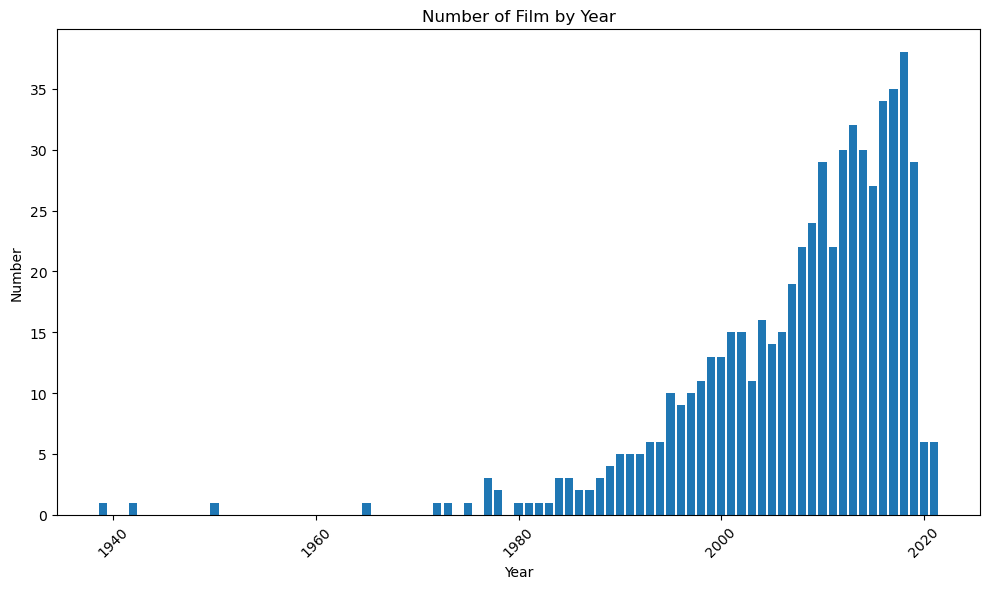

In [70]:
# 7. Bar Chart Number of Movies
plt.figure(figsize=(10,6))
plt.bar(df_year['year'], df_year['number_of_film'])
plt.title('Number of Film by Year')
plt.xlabel('Year')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **📊 Revenue Category Distribution**

**Insight:**  
Movies are categorized into three classes based on total worldwide revenue. Most movies are classified as "Hit / Average", while only a few achieve the status of "Blockbuster" or "Mega Blockbuster".

In [90]:
# 8. Revenue Category Count
query_kategori = '''
SELECT 
    category,
    COUNT(*) AS number_of_film
FROM (
    SELECT 
        CASE
            WHEN worldwidebox_office > 1500000000 THEN 'Mega Blockbuster'
            WHEN worldwidebox_office BETWEEN 1000000000 AND 1500000000 THEN 'Blockbuster'
            ELSE 'Hit / Average'
        END AS category
    FROM movies
)
GROUP BY category;
'''
df_kategori = pd.read_sql_query(query_kategori, conn)
df_kategori

,category,number_of_film
0,Blockbuster,36
1,Hit / Average,550
2,Mega Blockbuster,9


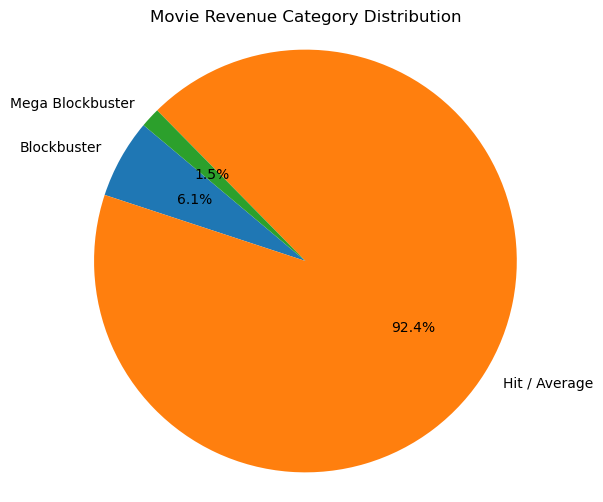

In [78]:
# 9. Pie Chart for Revenue Category
plt.figure(figsize=(6,6))
plt.pie(df_kategori['number_of_film'], labels=df_kategori['category'], autopct='%1.1f%%', startangle=140)
plt.title('Movie Revenue Category Distribution')
plt.axis('equal')
plt.show()

## 📈 Total Revenue by Year

In [60]:
# 10. Revenue by Year
query_bar = '''
SELECT year, SUM(worldwidebox_office) AS total_revenue
FROM movies
GROUP BY year
ORDER BY year;
'''
df_bar = pd.read_sql_query(query_bar, conn)
df_bar

,year,total_revenue
0,1939,390525192
1,1942,268000000
2,1950,263591415
3,1965,286214195
4,1972,268500000
5,1973,428214478
6,1975,470700000
7,1977,1398598486
8,1978,687683897
9,1980,549001242


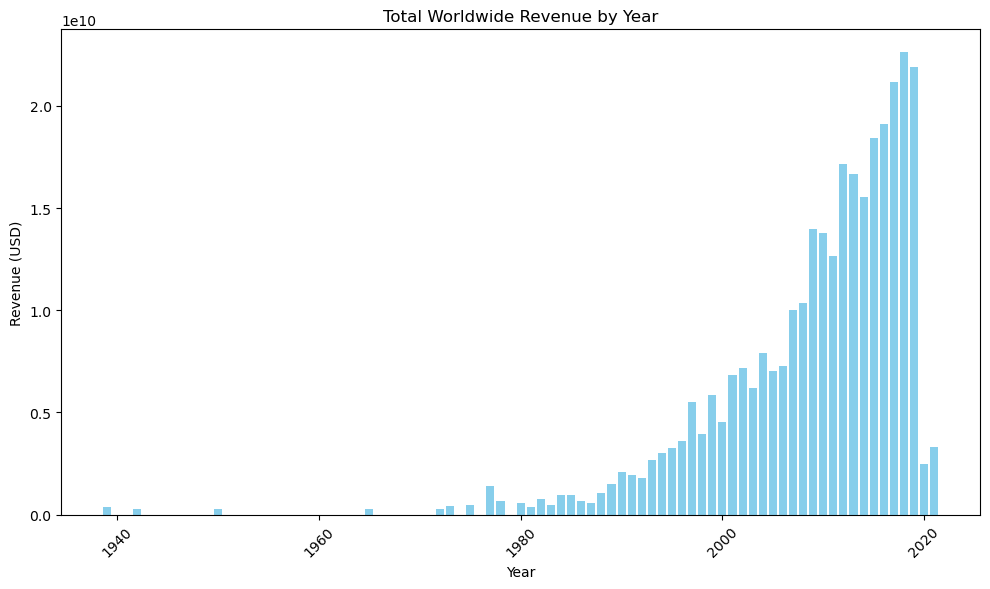

In [62]:
#. 11. Bar Chart for Revenue by Year 
plt.figure(figsize=(10,6))
plt.bar(df_bar['year'], df_bar['total_revenue'], color='skyblue')
plt.title('Total Worldwide Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🏆 Top 10 Highest-Grossing Movies

In [130]:
# 12. Top 10 Revenue
query_top10 = '''
SELECT movie, worldwidebox_office, domesticbox_office, internationalbox_office
FROM movies
ORDER BY worldwidebox_office DESC
LIMIT 10;
'''
df_top10 = pd.read_sql_query(query_top10, conn)
df_top10

,movie,worldwidebox_office,domesticbox_office,internationalbox_office
0,Avatar,2845899541,760507625.0,2085391916
1,Avengers: Endgame,2797800564,858373000.0,1939427564
2,Titanic,2207986545,659363944.0,1548622601
3,Star Wars Ep. VII: The Force Awakens,2064615817,936662225.0,1127953592
4,Avengers: Infinity War,2044540523,678815482.0,1365725041
5,Jurassic World,1669979967,652306625.0,1017673342
6,The Lion King,1654367425,543638043.0,1110729382
7,Furious 7,1516881526,353007020.0,1163874506
8,The Avengers,1515100211,623357910.0,891742301
9,Frozen II,1446925396,477373578.0,969551818


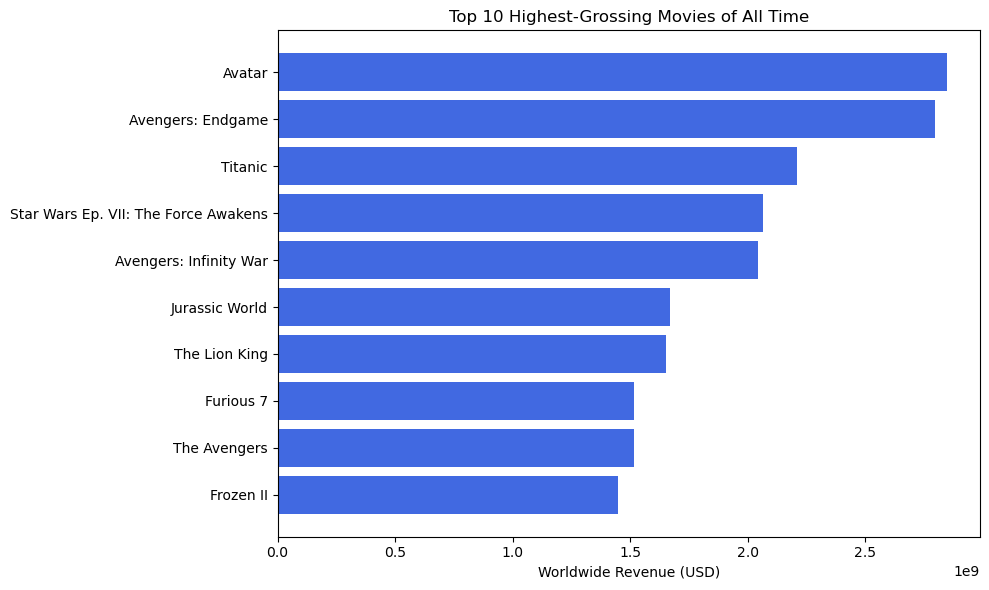

In [132]:
# 13. Bar plot Top 10 Revenue
plt.figure(figsize=(10, 6))
plt.barh(df_top10['movie'][::-1], df_top10['worldwidebox_office'][::-1], color='royalblue')
plt.xlabel('Worldwide Revenue (USD)')
plt.title('Top 10 Highest-Grossing Movies of All Time')
plt.tight_layout()
plt.show()

## **🌎 Domestic vs International Revenue in Top 10 Movies**

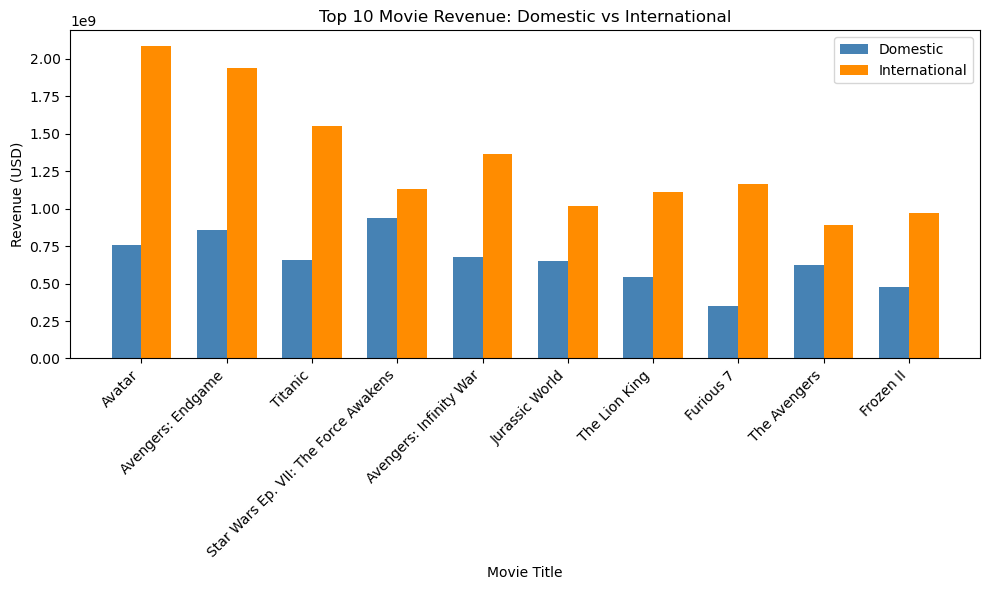

In [119]:
# 14. Bar plot Comparisson Between Domestic and International Revenue in Top 10 Movie
x = np.arange(len(df_top10))  # array posisi [0, 1, 2, ..., 9]
width = 0.35

plt.figure(figsize=(10,6))

# Bar domestic
plt.bar(x - width/2, df_top10['domesticbox_office'], width, label='Domestic', color='steelblue')

# Bar international
plt.bar(x + width/2, df_top10['internationalbox_office'], width, label='International', color='darkorange')

# Label dan title
plt.xlabel('Movie Title')
plt.ylabel('Revenue (USD)')
plt.title('Top 10 Movie Revenue: Domestic vs International')
plt.xticks(x, df_top10['movie'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## **📌 Domestic Revenue Ratio**

**Insight:**  
This histogram illustrates how much each movie relies on domestic (US) revenue. Most movies earn between 20%–50% of their total revenue domestically, highlighting the importance of global markets for box office success.

In [134]:
# 15. Domestic Revene Ratio
query_ratio = '''
SELECT 
    movie, 
    domesticbox_office,
    worldwidebox_office,
    ROUND(1.0 * domesticbox_office / worldwidebox_office, 3) AS domestic_ratio
FROM movies
WHERE worldwidebox_office > 0;
'''

df_ratio = pd.read_sql_query(query_ratio, conn)
df_ratio

,movie,domesticbox_office,worldwidebox_office,domestic_ratio
0,Avatar,760507625.0,2845899541,0.267
1,Avengers: Endgame,858373000.0,2797800564,0.307
2,Titanic,659363944.0,2207986545,0.299
3,Star Wars Ep. VII: The Force Awakens,936662225.0,2064615817,0.454
4,Avengers: Infinity War,678815482.0,2044540523,0.332
...,...,...,...,...
590,Knight and Day,76423035.0,258751370,0.295
591,Out of Africa,79096868.0,258210860,0.306
592,Super 8,127004179.0,257972745,0.492
593,American Hustle,150098456.0,257858943,0.582


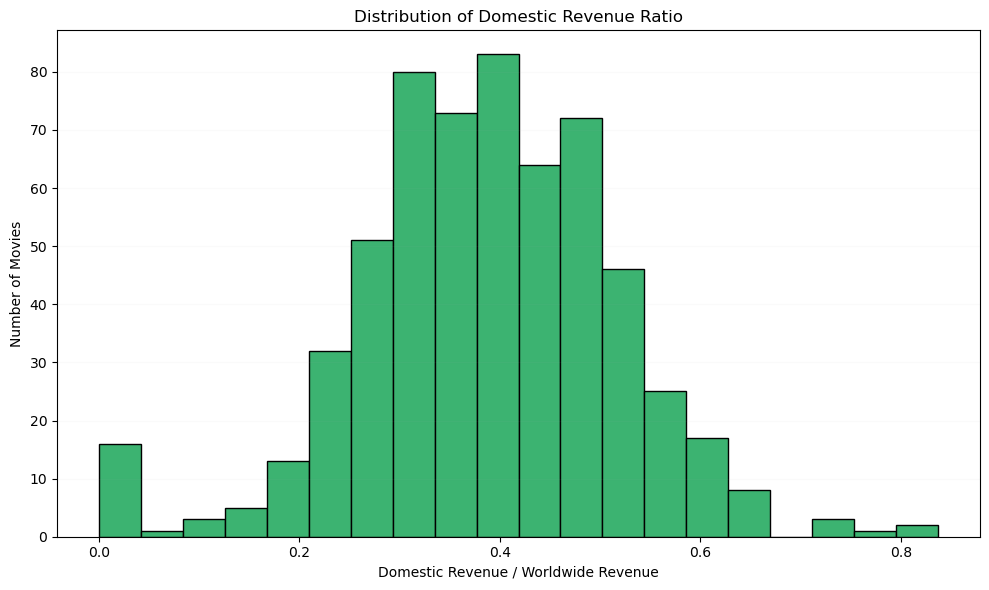

In [136]:
# 16. Hostogram of Domestic Revenue Ratio
plt.figure(figsize=(10,6))
plt.hist(df_ratio['domestic_ratio'], bins = 20, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Domestic Revenue Ratio')
plt.xlabel('Domestic Revenue / Worldwide Revenue')
plt.ylabel('Number of Movies')
plt.grid(axis='y', alpha=0.05)
plt.tight_layout()
plt.show()